# Explore here

In [69]:
import os
from sqlalchemy import create_engine
import pandas as pd
from dotenv import load_dotenv

# load the .env file variables
load_dotenv()

client_id = os.environ.get("473ab671b245469fa98250d34ce26723")
client_secret = os.environ.get("7d35bd5f67714510ae40944dc2261104")

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

linkin_park_uri = 'spotify:artist:6XyY86QOPPrYVGvF9ch6wz'
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials("473ab671b245469fa98250d34ce26723", "7d35bd5f67714510ae40944dc2261104" ))


results = spotify.artist_top_tracks(linkin_park_uri)
for track in results['tracks'][:10]:
    print('track: ' + track['name'])
    print('popularity: ' + str(track['popularity']))
    print('duration ms: ' + str(((track['duration_ms'])/(1000*60))%60))
    print()


track: In the End
popularity: 90
duration ms: 3.6146666666666665

track: Numb
popularity: 88
duration ms: 3.0931

track: What I've Done
popularity: 84
duration ms: 3.4204333333333334

track: Numb / Encore
popularity: 82
duration ms: 3.4288833333333333

track: Faint
popularity: 82
duration ms: 2.71

track: One Step Closer
popularity: 82
duration ms: 2.6222166666666666

track: Crawling
popularity: 81
duration ms: 3.482666666666667

track: Bleed It Out
popularity: 81
duration ms: 2.7404333333333333

track: Somewhere I Belong
popularity: 71
duration ms: 3.56555

track: Papercut
popularity: 79
duration ms: 3.0811



In [70]:
import pandas as pd

tracks = results["tracks"]
tracks = [{k: (v/(1000*60))%60 if k == "duration_ms" else v for k, v in track.items() if k in ["name", "popularity", "duration_ms"]} for track in tracks]

tracks_df = pd.DataFrame.from_records(tracks)
tracks_df.sort_values(["popularity"], inplace = True)

tracks_df.head()


,duration_ms,name,popularity
8,3.565550,Somewhere I Belong,71
9,3.081100,Papercut,79
6,3.482667,Crawling,81
7,2.740433,Bleed It Out,81
3,3.428883,Numb / Encore,82


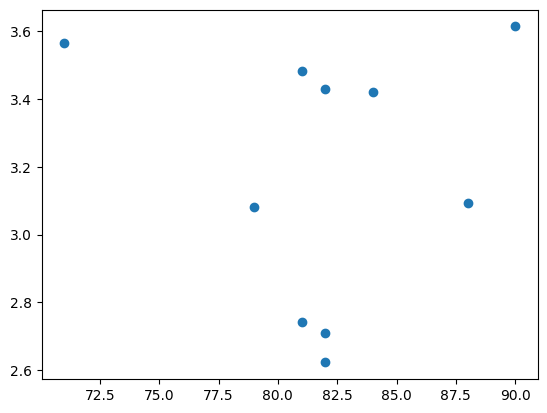

In [72]:
import matplotlib.pyplot as plt

scatter_plot = plt.scatter(data = tracks_df, x = "popularity", y = "duration_ms")
fig = scatter_plot.get_figure()
fig.savefig("scatter_plot.png")